Original dataset shape: (1000000, 8)
Class distribution:
 fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

=== Balancing Dataset ===

Resampled dataset shape (random undersampling): (174806, 7)
Resampled class distribution:
 fraud
0.0    87403
1.0    87403
Name: count, dtype: int64


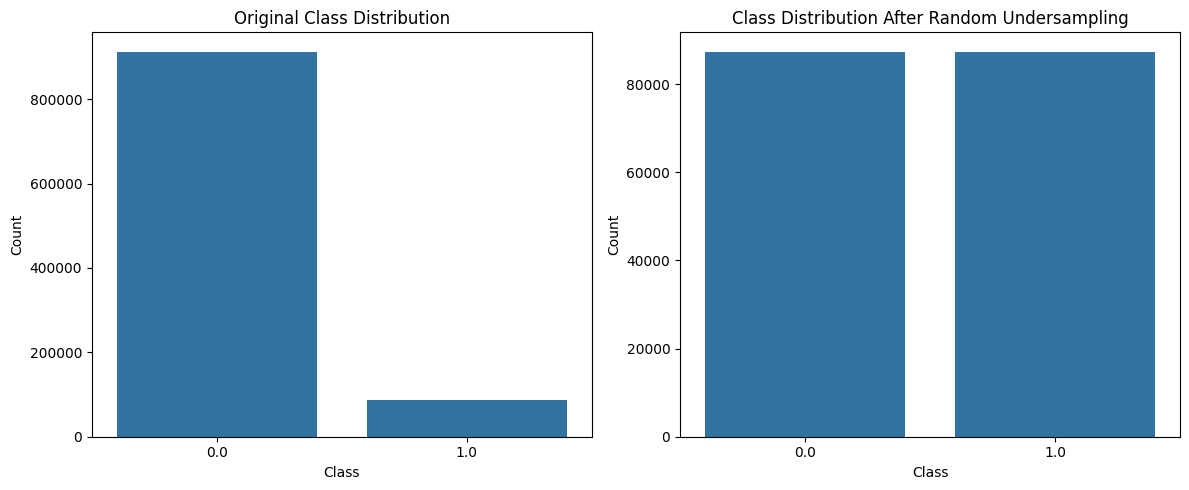


=== Model Training ===

Logistic Regression Model Performance:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     26231
         1.0       0.93      0.95      0.94     26211

    accuracy                           0.94     52442
   macro avg       0.94      0.94      0.94     52442
weighted avg       0.94      0.94      0.94     52442

Evaluation Metrics:
- Mean Directional Accuracy (MDA): 0.9393
- Mean Bias Error (MBE): 0.0088
- Root Mean Squared Error (RMSE): 0.2463
- Relative Root Mean Squared Error (RRMSE): 0.2463
- Accuracy: 0.9393

=== Fraud Prevention Simulation ===

Transaction Details: [57.87785658  0.31114001  1.94593998  1.          1.        ]...
Fraud Prediction: Legitimate
Probability: Legitimate=0.9981, Fraudulent=0.0019

Transaction Details: [ 2.13195567 56.37240054  6.35866732  1.          0.        ]...
Fraud Prediction: Fraudulent
Probability: Legitimate=0.0018, Fraudulent=0.9982

=== Fraud Prevention Process ===
1

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

class CCFDP:
    def __init__(self):
        self.model = None
        self.scaler = StandardScaler()
        self.rus = RandomUnderSampler(random_state=42)

    def load_data(self, filepath):
        """Load and preprocess the credit card transaction data"""
        self.data = pd.read_csv(filepath)
        print("Original dataset shape:", self.data.shape)
        print("Class distribution:\n", self.data['fraud'].value_counts())

        # Separate features and target
        self.X = self.data.drop('fraud', axis=1)
        self.y = self.data['fraud']

        # Handle NaN values in the target variable 'fraud' before scaling
        self.data = self.data.dropna(subset=['fraud'])
        self.X = self.data.drop('fraud', axis=1)
        self.y = self.data['fraud']

    def balance_dataset(self, sampling_strategy='auto'):
        """
        Apply random undersampling to balance the dataset
        """
        sampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
        self.X_scaled = self.scaler.fit_transform(self.X)
        self.X_resampled, self.y_resampled = sampler.fit_resample(self.X_scaled, self.y)

        print("\nResampled dataset shape (random undersampling):", self.X_resampled.shape)
        print("Resampled class distribution:\n", pd.Series(self.y_resampled).value_counts())
        self.plot_class_distribution()

    def plot_class_distribution(self):
        """Plot class distribution before and after undersampling"""
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.countplot(x=self.y)
        plt.title('Original Class Distribution')
        plt.xlabel('Class')
        plt.ylabel('Count')

        plt.subplot(1, 2, 2)
        sns.countplot(x=self.y_resampled)
        plt.title('Class Distribution After Random Undersampling')
        plt.xlabel('Class')
        plt.ylabel('Count')

        plt.tight_layout()
        plt.show()

    def calculate_metrics(self, y_true, y_pred, y_prob):
        """Calculate various evaluation metrics"""
        mda = accuracy_score(y_true, y_pred)
        mbe = np.mean(y_pred - y_true)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        rrmse = rmse / (np.max(y_true) - np.min(y_true))
        accuracy = accuracy_score(y_true, y_pred)

        return {
            'MDA': mda,
            'MBE': mbe,
            'RMSE': rmse,
            'RRMSE': rrmse,
            'Accuracy': accuracy
        }

    def train_model(self):
        """Train the fraud detection model using Logistic Regression"""
        X_train, X_test, y_train, y_test = train_test_split(
            self.X_resampled, self.y_resampled, test_size=0.3, random_state=42
        )

        self.model = LogisticRegression(max_iter=1000, random_state=42)
        self.model.fit(X_train, y_train)

        y_pred = self.model.predict(X_test)
        y_prob = self.model.predict_proba(X_test)[:, 1]

        metrics = self.calculate_metrics(y_test, y_pred, y_prob)

        print("\nLogistic Regression Model Performance:")
        print(classification_report(y_test, y_pred))
        print("Evaluation Metrics:")
        print(f"- Mean Directional Accuracy (MDA): {metrics['MDA']:.4f}")
        print(f"- Mean Bias Error (MBE): {metrics['MBE']:.4f}")
        print(f"- Root Mean Squared Error (RMSE): {metrics['RMSE']:.4f}")
        print(f"- Relative Root Mean Squared Error (RRMSE): {metrics['RRMSE']:.4f}")
        print(f"- Accuracy: {metrics['Accuracy']:.4f}")

    def fraud_prevention(self, transaction_data):
        """Simulate the fraud prevention process"""
        transaction_scaled = self.scaler.transform([transaction_data])
        prediction = self.model.predict(transaction_scaled)
        proba = self.model.predict_proba(transaction_scaled)

        print(f"\nTransaction Details: {transaction_data[:5]}...")
        print(f"Fraud Prediction: {'Fraudulent' if prediction[0] else 'Legitimate'}")
        print(f"Probability: Legitimate={proba[0][0]:.4f}, Fraudulent={proba[0][1]:.4f}")

        if prediction[0] == 1:
            print("\n=== Fraud Prevention Process ===")
            print("1. Sending verification code to registered phone...")
            verification_code = "123456"
            user_input = "123456"

            if user_input == verification_code:
                print("Verification successful. Transaction approved.")
            else:
                print("Verification failed. Sending security question...")
                security_answer = "blue"
                user_answer = "blue"

                if user_answer == security_answer:
                    print("Security question answered correctly. Transaction approved.")
                else:
                    print("Security question failed. Transaction blocked and card frozen.")

        return prediction[0], proba[0]

# Example usage
if __name__ == "__main__":
    fraud_detector = CCFDP()
    fraud_detector.load_data('card_transdata.csv')

    print("\n=== Balancing Dataset ===")
    fraud_detector.balance_dataset()

    print("\n=== Model Training ===")
    fraud_detector.train_model()

    print("\n=== Fraud Prevention Simulation ===")
    legit_sample = fraud_detector.X[fraud_detector.y == 0].iloc[0].values
    fraud_detector.fraud_prevention(legit_sample)

    if 1 in fraud_detector.y.values:
        fraud_sample = fraud_detector.X[fraud_detector.y == 1].iloc[0].values
        fraud_detector.fraud_prevention(fraud_sample)
